CSCI E-82 - Advanced Machine Learning, Data Mining and Artificial Intelligence
=====

# Project - Exploration Notebook

### *Dominic Murphy and David Modjeska*

------

# Introduction

In [1]:
import itertools
import multiprocessing
import numpy as np
import os
import pandas as pd
import glob
import re
import warnings

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

%matplotlib inline
from IPython.display import Image, display, HTML

In [2]:
def my_display(str): 
    display(HTML(str))
    
def my_display_df(df): 
    display(HTML(df.to_html(index=False)))
    
def my_linespace():
    my_display('<p>')
    
plt.rcParams["patch.force_edgecolor"] = True   
plt.style.use('ggplot')

palette = sns.color_palette(palette = 'deep')
sns.set_palette(palette)
palette_len = len(palette)

# Load and explore data

In [3]:
# data_dir = './data/'
# data_files = glob.glob(data_dir + '*.csv')
# n_files = len(data_files)

In [4]:
data = pd.read_csv('source_data.csv', parse_dates = ['date_key'])
print(data.shape)

(6551, 151)


#### First few rows of data

In [5]:
data.head()

,date_dayofyear,date_key,date_month,date_qtr,AU_IS_WORK_DAY,US_IS_WORK_DAY,CA_IS_WORK_DAY,UK_IS_WORK_DAY,IS_EURO,AU_FX,...,UK_FX_MA_090,UK_FX_MA_180,UK_FX_MA_365,temperature,AU_BMP_Ratio,CA_BMP_Ratio,UK_BMP_Ratio,CH_BMP_Ratio,JP_BMP_Ratio,time_index
0,3,2000-01-03,1,1,0,1,1,0,1,0.6591,...,1.628023,1.617005,1.617082,-0.943863,0.680107,0.784969,1.231594,3.715825,1.151735,0
1,4,2000-01-04,1,1,1,1,1,0,1,0.6562,...,1.627812,1.617446,1.617025,-0.940453,0.677115,0.782104,1.239163,3.658705,1.136206,1
2,5,2000-01-05,1,1,1,1,1,1,1,0.6550,...,1.627695,1.617946,1.616983,-0.940453,0.675876,0.782104,1.242570,3.649538,1.128760,2
3,6,2000-01-06,1,1,1,1,1,1,1,0.6540,...,1.627645,1.618471,1.616963,-0.936941,0.674845,0.779259,1.247112,3.652829,1.113523,3
4,7,2000-01-07,1,1,1,1,1,1,1,0.6548,...,1.627491,1.618938,1.616933,-0.936941,0.675670,0.782805,1.240223,3.672339,1.113735,4


#### Summarize data

In [6]:
data.describe()

,date_dayofyear,date_month,date_qtr,AU_IS_WORK_DAY,US_IS_WORK_DAY,CA_IS_WORK_DAY,UK_IS_WORK_DAY,IS_EURO,AU_FX,CA_FX,...,UK_FX_MA_090,UK_FX_MA_180,UK_FX_MA_365,temperature,AU_BMP_Ratio,CA_BMP_Ratio,UK_BMP_Ratio,CH_BMP_Ratio,JP_BMP_Ratio,time_index
count,6551.000000,6551.000000,6551.000000,6551.000000,6551.000000,6551.000000,6551.000000,6551.0,6551.000000,6551.000000,...,6551.000000,6551.000000,6551.000000,6551.000000,6551.000000,6551.000000,6551.000000,6551.000000,6551.000000,6551.000000
mean,182.619142,6.505877,2.503893,0.824607,0.828728,0.830408,0.820485,1.0,0.786446,0.837985,...,1.621164,1.623321,1.627908,-0.320844,0.866499,0.976675,1.041848,2.230303,0.814622,3275.000000
std,105.130086,3.439366,1.115584,0.380332,0.376775,0.375303,0.383812,0.0,0.155226,0.124899,...,0.189532,0.185002,0.173751,0.717895,0.168813,0.134901,0.136502,0.982158,0.133184,1891.255139
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.482800,0.620040,...,1.236609,1.239573,1.265302,-1.000000,0.570267,0.768694,0.734812,1.139632,0.610426,0.000000
25%,92.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.700500,0.745712,...,1.504523,1.517733,1.540430,-0.949094,0.764517,0.855566,0.942023,1.339431,0.702673,1637.500000
50%,183.000000,7.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.768000,0.836330,...,1.590274,1.588332,1.589011,-0.636151,0.845898,0.947611,1.050718,1.982626,0.799564,3275.000000
75%,274.000000,9.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.910350,0.957839,...,1.752787,1.764905,1.774196,0.335596,0.998079,1.097065,1.159948,2.708979,0.933769,4912.500000
max,366.000000,12.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.102600,1.090750,...,2.049321,2.034080,2.007679,1.000000,1.240384,1.257143,1.286362,4.533681,1.151735,6550.000000


## Visualize data

In [7]:
feature_cols = [data.columns[i] for i in range(len(data.columns)) 
                       if re.search('USD_FX|date_key|time_index|date_|temperature|IS_EURO', data.columns[i]) == None]
n_feature_cols = len(feature_cols)

first_date = data.date_key[0]
last_date = data.date_key[data.shape[0] - 1]

### Helper functions

In [8]:
def vis_data_subset(pattern, negate = False, color = 0):  
    if not negate:
        these_cols = [feature_cols[i] for i in range(n_feature_cols) 
                       if re.search(pattern, feature_cols[i])]
    else:
        these_cols = [feature_cols[i] for i in range(n_feature_cols) 
               if re.search(pattern, feature_cols[i]) == None]
    n_features = len(these_cols)
    these_cols = np.sort(these_cols)
    print()

    n_cols = 3
    n_rows = (n_features // n_cols) + (1 if n_features % n_cols > 0 else 0)

    fig_height = n_rows * 3.75
    f, axes = plt.subplots(nrows = n_rows, ncols = n_cols, figsize = (12, fig_height))
    for i in range(n_features):
        feature_name = these_cols[i]
        this_data = pd.concat([data.date_key, data[feature_name]], axis = 1)
        ax = axes[i // n_cols, i % n_cols]
        this_data.plot(x = 'date_key', y = feature_name, ax = ax, legend = False, 
                       title = feature_name, color = palette[color % palette_len], rot = 45,
                       xlim = [first_date, last_date])
        ax.set_xlabel('Year')        

    plt.tight_layout(h_pad = 2.0)
    plt.show()

### FX rates

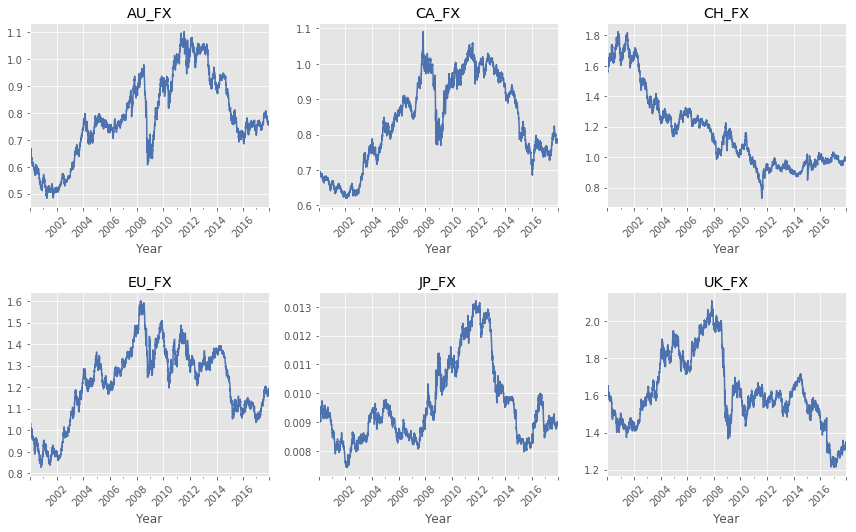

In [9]:
vis_data_subset('FX$', color = 0)

### GDP (Growth Rate Previous Period, Seasonally Adjusted)

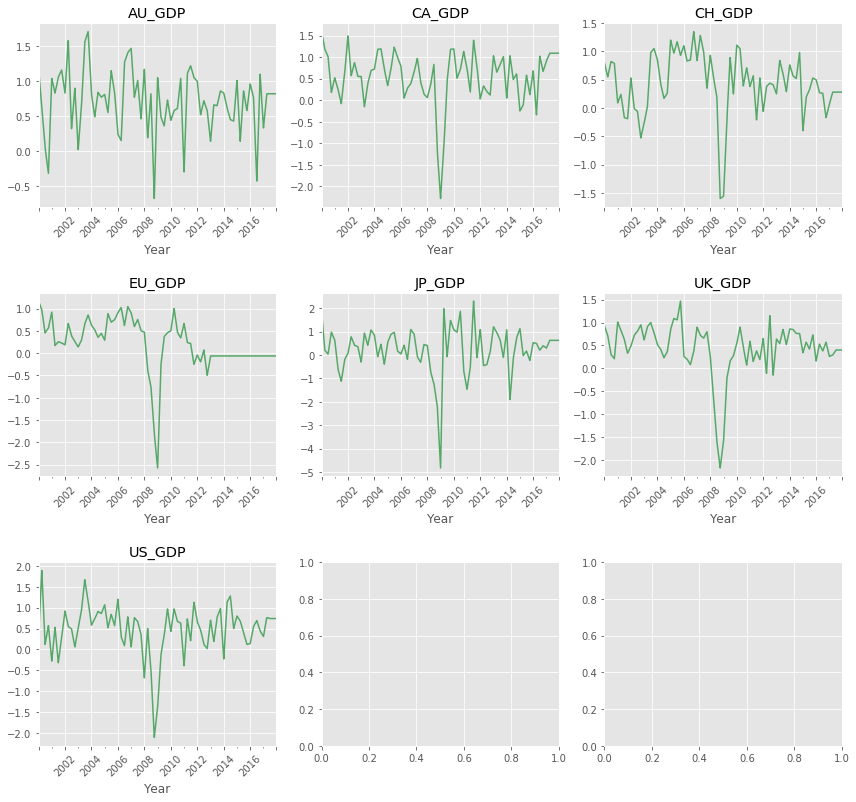

In [10]:
vis_data_subset('GDP', color = 1)

### CPI (Growth Rate Same Period Previous Year, Not Seasonally Adjusted, Monthly)

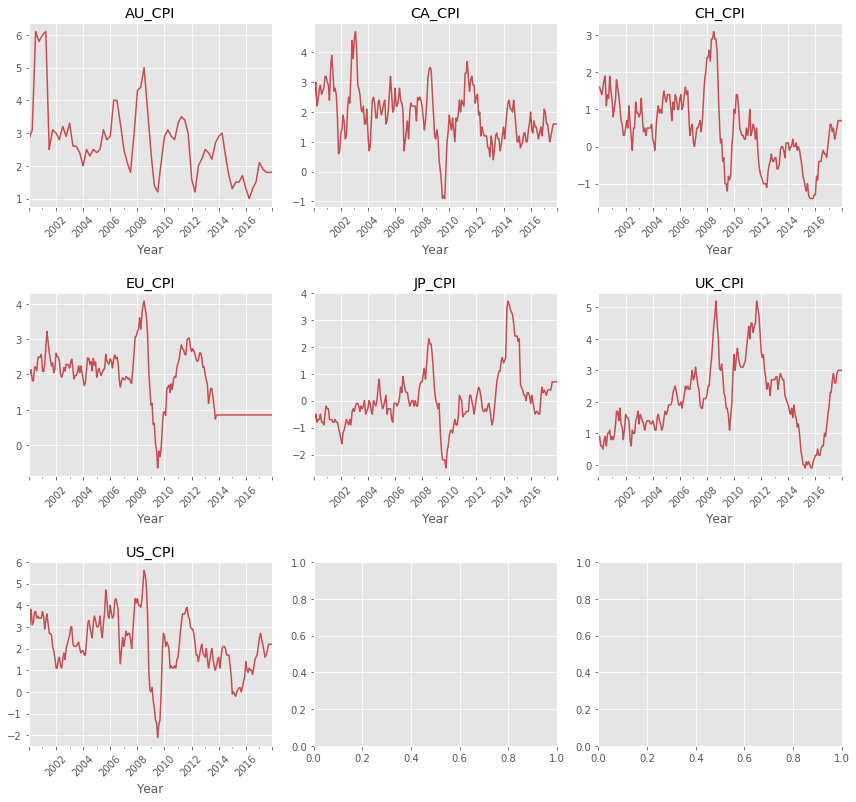

In [11]:
vis_data_subset('CPI', color = 2)

### Unemployment rate (Unemployment Rate: Aged 15 and Over: All Persons )

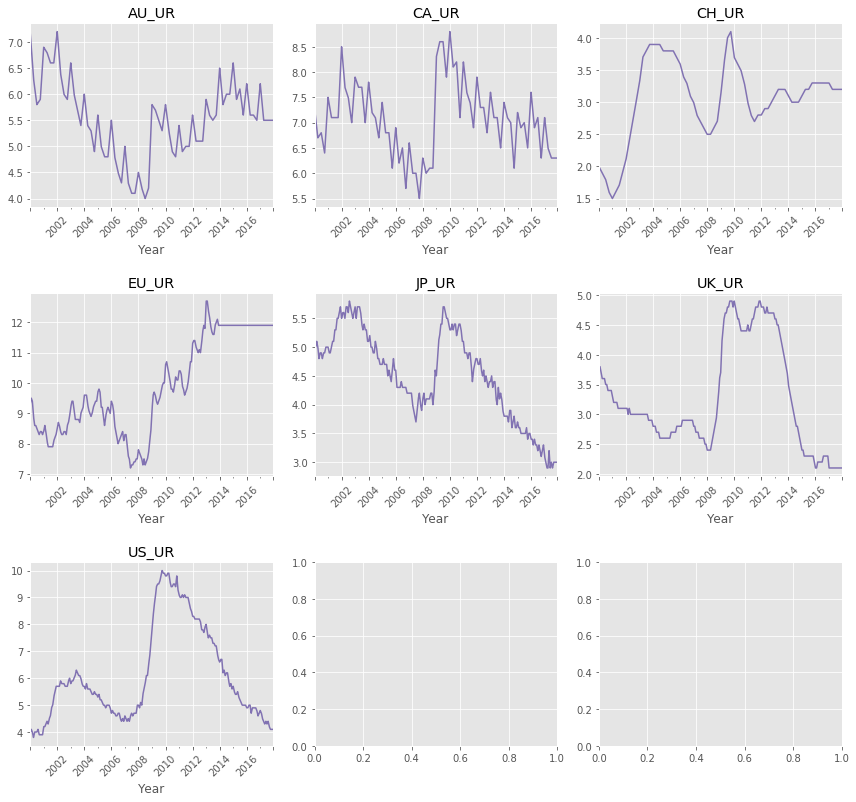

In [12]:
vis_data_subset('UR', color = 3)

### Interest rates

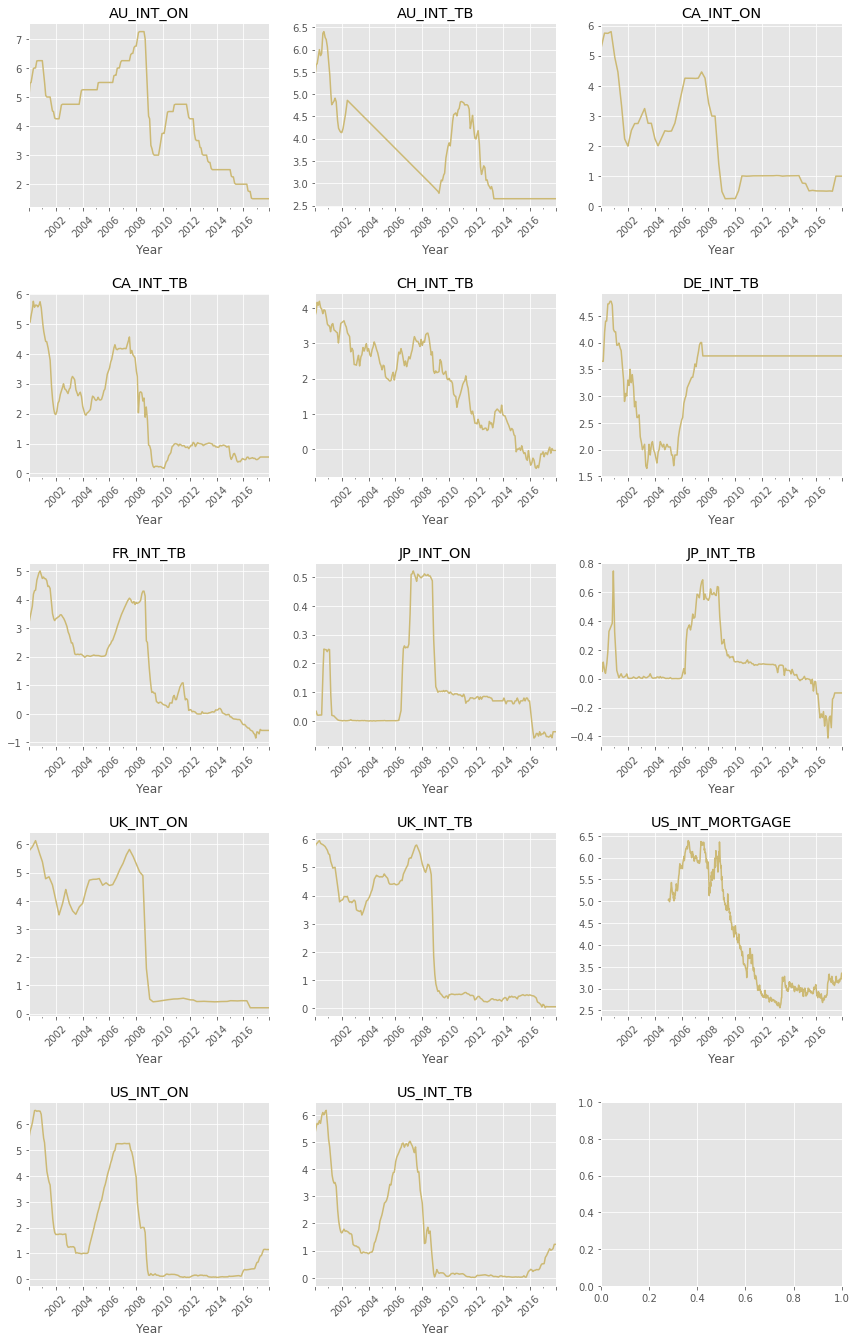

In [13]:
vis_data_subset('INT', color = 4)

### Government debt (As a % of GDP, Not Seasonally Adjusted)

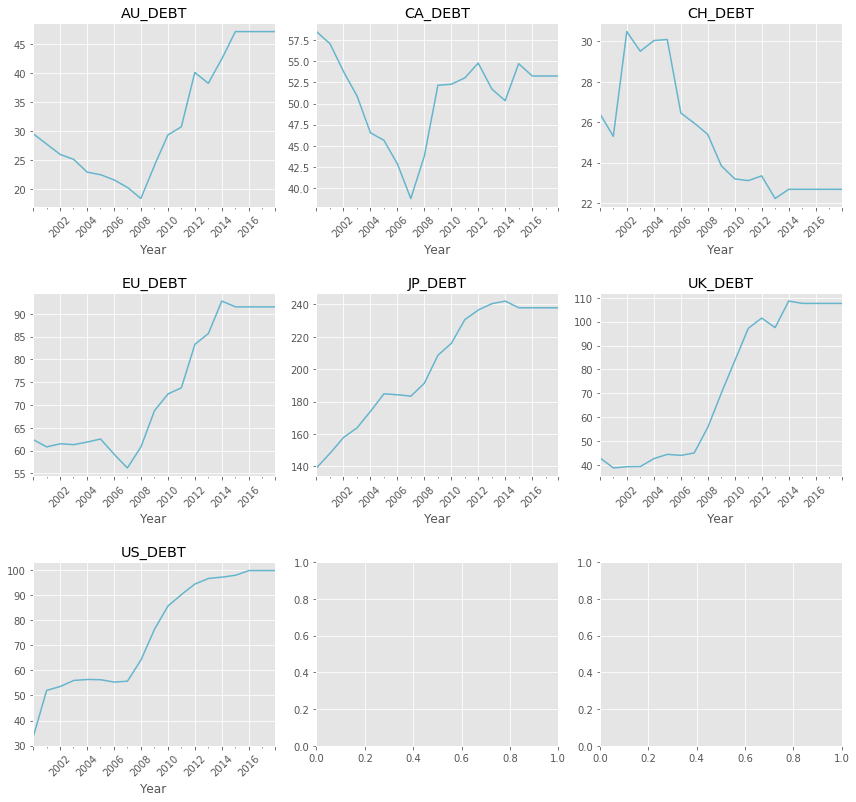

In [14]:
vis_data_subset('DEBT', color = 5)

### Population Growth (year on year % change)

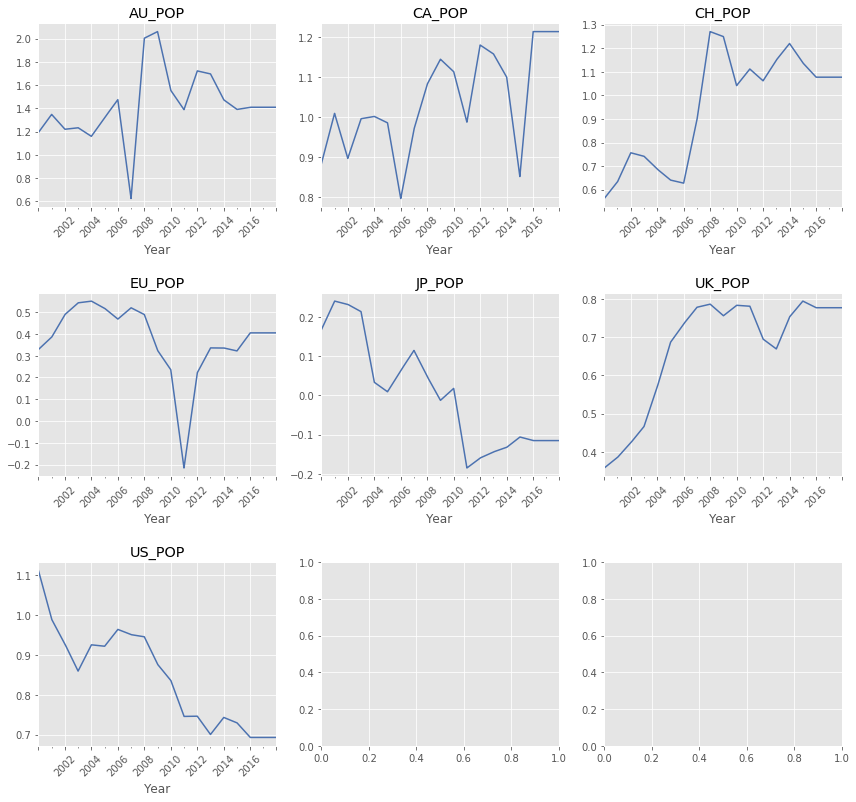

In [15]:
vis_data_subset('POP', color = 6)

### Oil

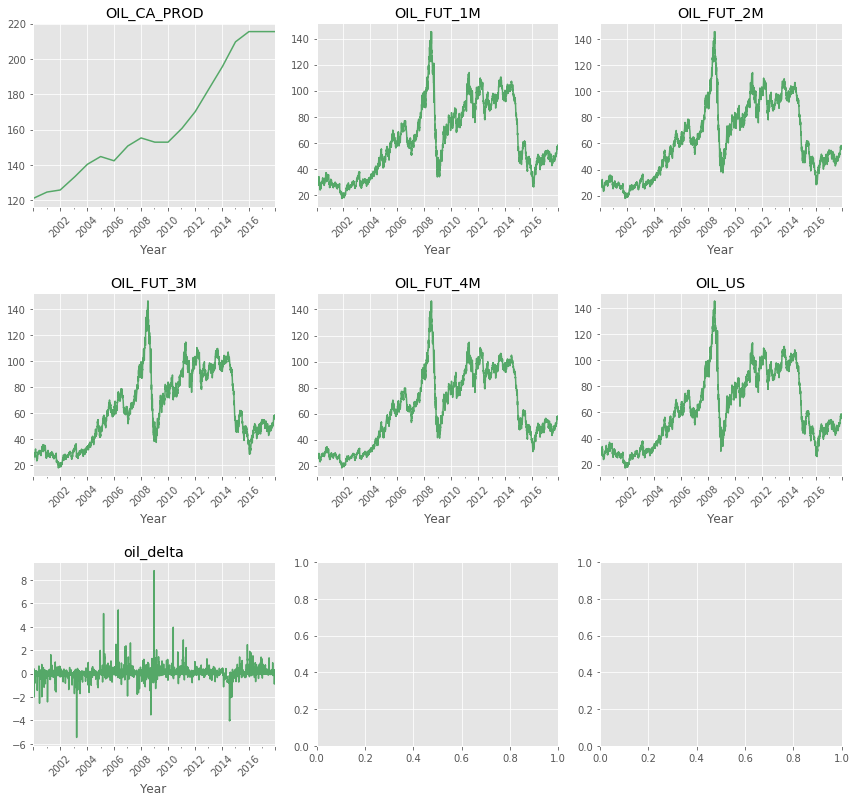

In [16]:
vis_data_subset('OIL|oil', color = 7)

### "Big Mac" Index

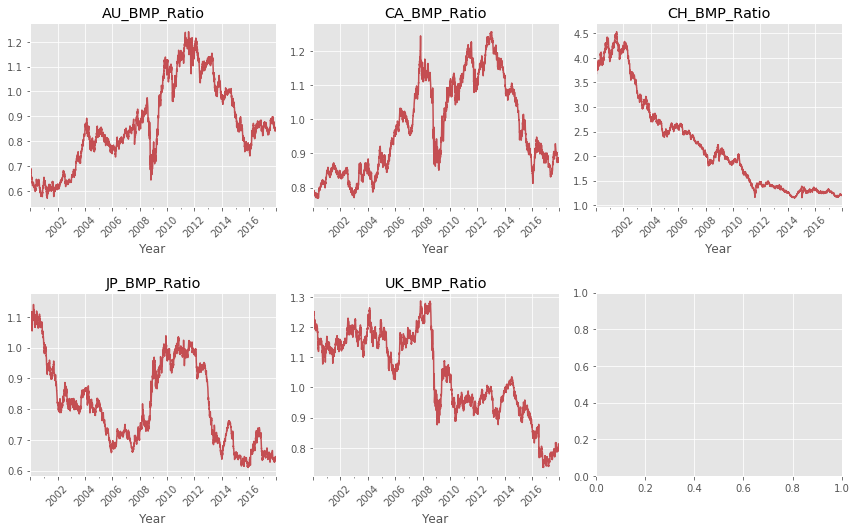

In [17]:
vis_data_subset('BMP_Ratio', color = 8)

### Resources and Miscellaneous

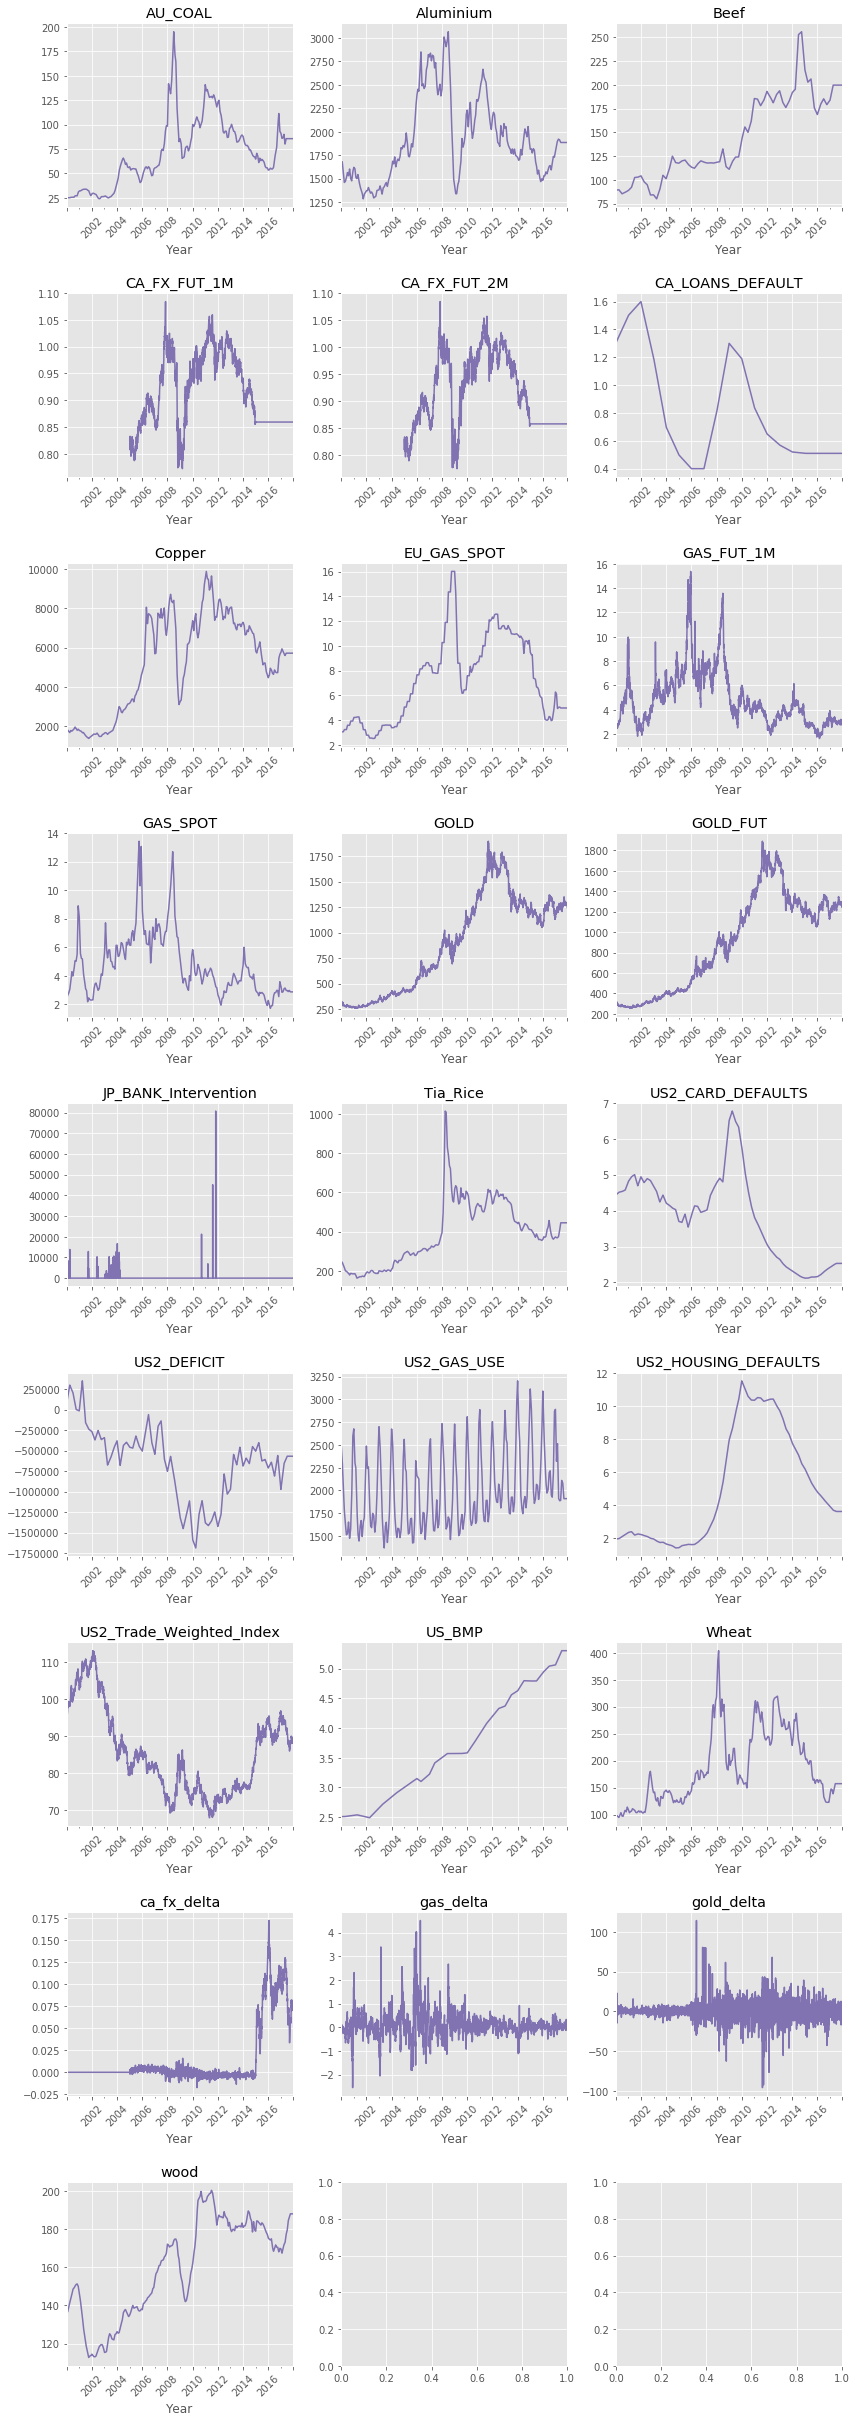

In [18]:
miscellaneous_pattern = 'FX$|GDP|CPI|UR|INT|DEBT|POP|OIL|oil|index|WORK|FX_MA|BMP_Ratio' # negate
vis_data_subset(miscellaneous_pattern, negate = True, color = 9)

### APPENDIX: FX rates - moving averages

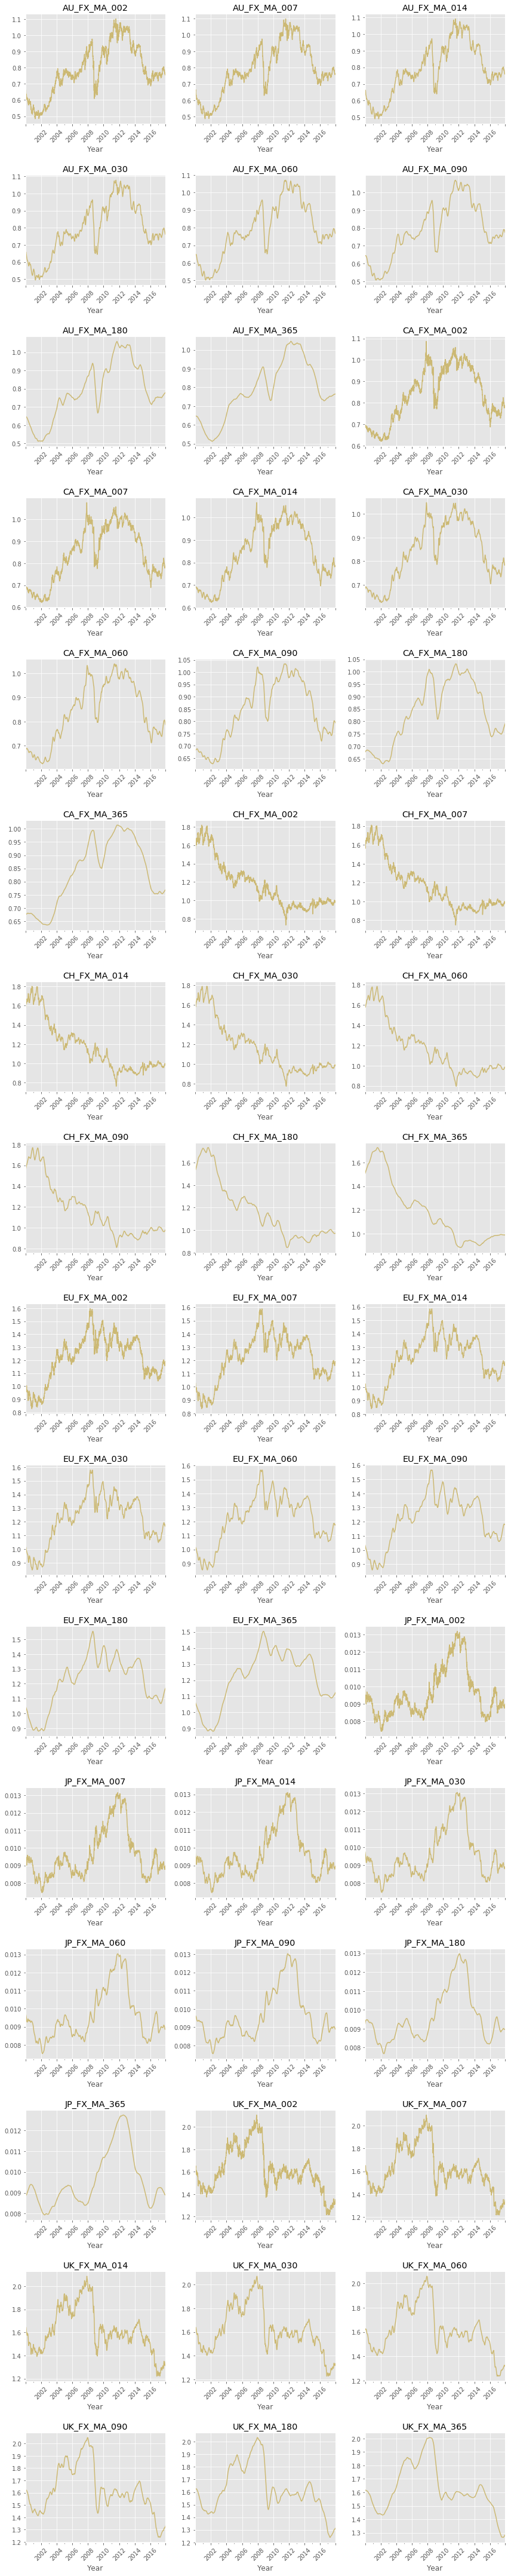

In [19]:
vis_data_subset('FX_MA', color = 10)